<a href="https://colab.research.google.com/github/balszeg/deep_learning_kishf1/blob/master/GWCSU3_kishf1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Installing the necessary utilities:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import cv2
import librosa
import librosa.display
import IPython.display as ipd
from google.colab import drive
from PIL import Image

#Mounting the user's Google Drive, from where the program loads the input datas 
drive.mount('/content/drive')

Mounted at /content/drive


Setting the right path for the images. **Important to note**, the user has to have similar directory structure, as the code indicate below:


In [2]:
image_path = "content/drive/My Drive/images"
%cd /content/drive/My\ Drive/images

/content/drive/My Drive/images


**Important to note**, the pictures must be in jpg format! Reading in and displaying the pictures with original sizes:

['koala.jpg', 'husky.jpg', 'python.jpg', 'ocean.jpg', 'forest.jpg']


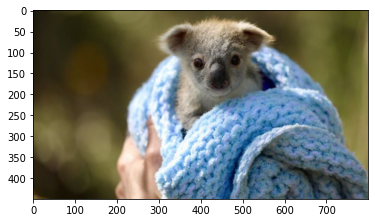

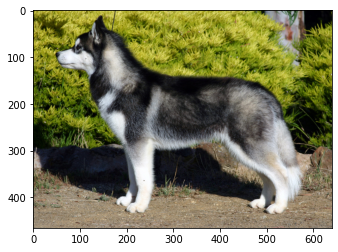

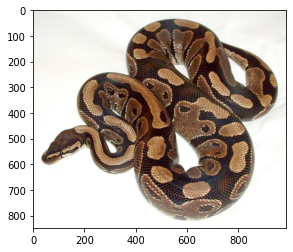

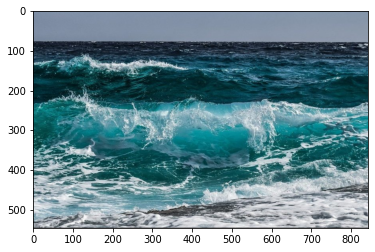

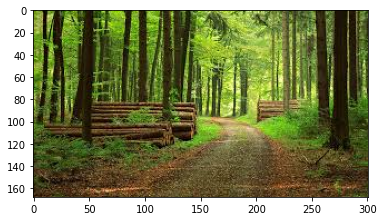

In [3]:
items = os.listdir('/content/drive/My Drive/images/') #reading the images directory content
print(items) #printing the names of the pictures

for each_image in items: #reading in each pictures
  if each_image.endswith(".jpg"):
    full_path = "/content/drive/My Drive/images/" + each_image
    each_image = cv2.imread(full_path)
    each_image = cv2.cvtColor(each_image,cv2.COLOR_BGR2RGB) #converting to RGB pictures
    plt.figure()
    plt.imshow(each_image) #showing the loaded pictures in original sizes

Reshaping and displaying the pictures to 128x128 size:

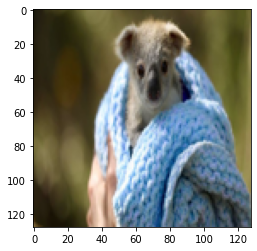

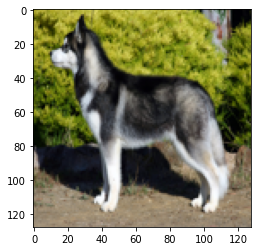

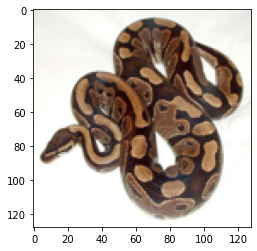

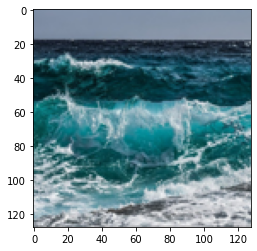

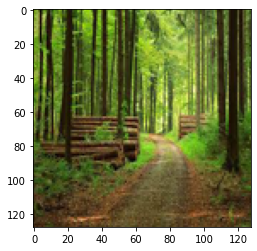

In [4]:
for each_image in items: #this part is similar, as the last step except one modification
  if each_image.endswith(".jpg"):
    full_path = "/content/drive/My Drive/images/" + each_image
    load_img_rz = np.array(Image.open(full_path).resize((128,128))) #here is a resizing to 128x128 size
    Image.fromarray(load_img_rz).save(full_path) #saving all resized images
    plt.figure()
    plt.imshow(load_img_rz) #plotting them

Listing all the 5 pictures RGB channels into one tensor:

In [5]:
folder = '/content/drive/My Drive/images'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB")) #converting the images to RGB pixel arrays

ims = [read(os.path.join(folder, filename)) for filename in os.listdir(folder)] #searching through the given folder for images
im_array = np.array(ims, dtype='uint8') #making them to an array
print(im_array) #plotting

[[[[ 27  23  12]
   [ 29  25  14]
   [ 30  26  15]
   ...
   [101  96  40]
   [110 103  48]
   [112 106  48]]

  [[ 27  23  12]
   [ 29  25  14]
   [ 31  27  15]
   ...
   [101  96  40]
   [110 103  48]
   [112 105  50]]

  [[ 27  23  12]
   [ 30  26  15]
   [ 33  29  17]
   ...
   [101  96  41]
   [110 103  48]
   [112 105  50]]

  ...

  [[ 91  75  49]
   [ 72  58  31]
   [ 51  37  11]
   ...
   [ 87 104 120]
   [ 70  89 106]
   [ 60  79  96]]

  [[113  97  71]
   [ 92  76  50]
   [ 67  53  27]
   ...
   [ 91 110 127]
   [ 71  92 111]
   [ 59  80 101]]

  [[124 109  80]
   [106  90  64]
   [ 85  71  45]
   ...
   [ 89 107 127]
   [ 76  97 118]
   [ 68  89 110]]]


 [[[134 128  18]
   [175 169  59]
   [161 157  47]
   ...
   [  3   1   0]
   [  3   2   0]
   [ 14  13   0]]

  [[181 174  67]
   [173 166  59]
   [187 183  75]
   ...
   [  3   0   0]
   [  8   5   0]
   [ 21  19   7]]

  [[155 151  44]
   [146 142  35]
   [174 169  65]
   ...
   [  4   2   5]
   [ 11   9  10]
   [ 22  20

#2. Calculating the pixels means for each channel:

In [6]:
from numpy import asarray

meanarray = [] #making an empty list, for storing the calculated values

for each_image in items: 
  if each_image.endswith(".jpg"):
    full_path = "/content/drive/My Drive/images/" + each_image
    image = Image.open(full_path) #loading in the images
    data = asarray(image) #making them into an RGB pixel array
    mean = np.mean(data, axis=(0,1)) #calculating the mean of the array according to the channels
    meanarray.append(mean) #append the means
meanarray = np.asarray(meanarray) #making an array from the appended data
print(meanarray)

[[105.1295166  110.29931641 100.02966309]
 [110.22412109 109.64666748  72.13214111]
 [179.82836914 166.41448975 156.34338379]
 [ 85.64733887 123.1739502  133.67523193]
 [ 92.17987061  98.84625244  40.11584473]]


Calculating the pixels deviations for each channel:

In [7]:
#similar as the step before
devarray = []

for each_image in items:
  if each_image.endswith(".jpg"):
    full_path = "/content/drive/My Drive/images/" + each_image
    image = Image.open(full_path)
    data = asarray(image)
    dev = np.std(data, axis=(0,1)) #except this step, where the standard deviation calculated
    devarray.append(dev)
devarray = np.asarray(devarray)
print(devarray)

[[53.19495461 55.8685308  74.4659918 ]
 [62.98162236 60.79185196 60.00067693]
 [77.78237344 89.96765987 95.8162769 ]
 [64.56244249 51.99386692 52.00395828]
 [41.20948748 50.77445129 27.49117193]]


Standardization of the datas, then checking for the 0 means and 1 expected values:

In [8]:
stand_data = im_array.astype('float') #converting to float
for x in range(5):
  for y in range(3):
    stand_data[x,:,:,y] = stand_data[x,:,:,y] - meanarray[x][y]
    stand_data[x,:,:,y] = stand_data[x,:,:,y] / devarray[x][y]
    meanarray[x][y] = np.mean(stand_data[x,:,:,y])
    devarray[x][y] = np.std(stand_data[x,:,:,y])
print(meanarray)
print(devarray)

[[ 1.38777878e-17 -2.77555756e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.38777878e-17  2.77555756e-17 -1.38777878e-17]
 [ 5.55111512e-17 -2.77555756e-17 -2.77555756e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


#3. Reading a sound file and making its spectogram. **Important to note**, the sound file is in another directory:


<class 'numpy.ndarray'> <class 'int'>
(2577024,) 44100


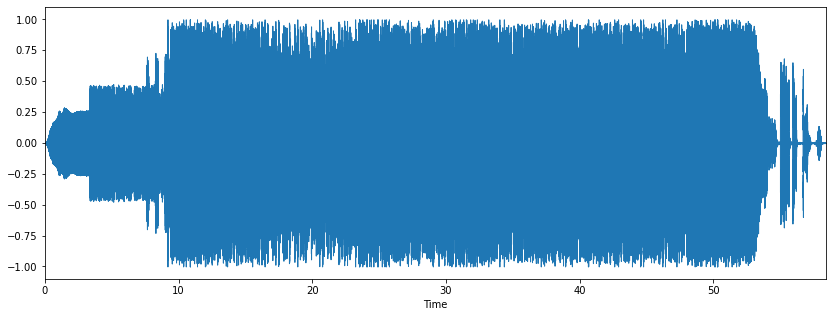

In [9]:
sound_path = "/content/drive/My Drive/sound/" #setting the location of the sound file
x, sr = librosa.load(sound_path + "sav.wav", sr=44100) #loading in it the sound file

#settings of a waveform
print(type(x), type(sr))
print(x.shape, sr)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr) #displaying the waveform

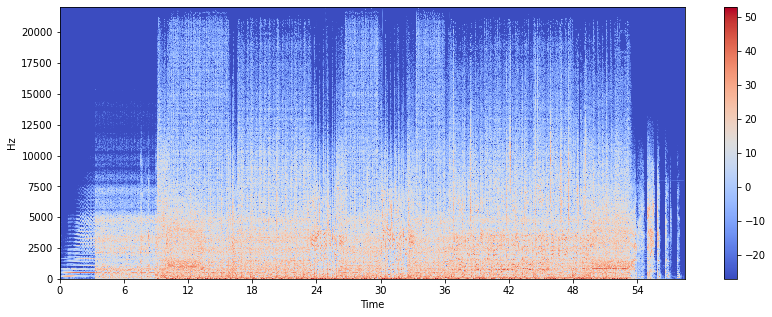

In [10]:
#converting the waveform to spectogragram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# 4. Website downloading:

In [11]:
from bs4 import BeautifulSoup #importing the utilities
import requests
import json

url = 'https://en.wikipedia.org/wiki/Deep_learning' #the given URL which has to be read
response = requests.get(url, timeout=5)
content = BeautifulSoup(response.content, "html.parser") #getting the given webside content in html
text = content.get_text() #getting the html in plain text
print(text) #printing out





Deep learning - Wikipedia
document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"67420765-2a8a-407b-8f33-76a4ff2d15ff","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Deep_learning","wgTitle":"Deep learning","wgCurRevisionId":980693328,"wgRevisionId":980693328,"wgArticleId":32472154,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1: long volume value","CS1 errors: missing periodical","CS1 maint: archived copy as title","Articles with short description","Short description matches Wikidata","Wikipedia references cleanup from June 2020","All articles needing references cleanup",
"Articles covered by WikiPro

Histogram of character occurrences:

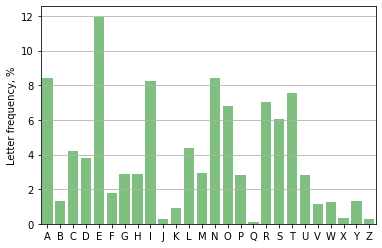

In [12]:
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' #the characters, which counting is necessary
lcount = dict([(l, 0) for l in letters])

#counting the letters in the given text
for l in text:
    try:
        lcount[l.upper()] += 1
    except KeyError:
        pass

norm = sum(lcount.values())

fig = plt.figure()
ax = fig.add_subplot(111)

#the parameters of the histogram
x = range(26)
ax.bar(x, [lcount[l]/norm * 100 for l in letters], width=0.8,
       color='g', alpha=0.5, align='center')
ax.set_xticks(x)
ax.set_xticklabels(letters)
ax.tick_params(axis='x', direction='out')
ax.set_xlim(-0.5, 25.5)
ax.yaxis.grid(True)
ax.set_ylabel('Letter frequency, %')
plt.show()